In [2]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
from datetime import datetime
from jtwc import load_jtwc_data
plt.rcParams['figure.figsize'] = (16, 12)

In [3]:
input_path = r"X:\georisk\HaRIA_B_Wind\data\raw\from_jtwc\bsh"
df = load_jtwc_data(input_path)


c:\WorkSpace\tcha\wind-radii\jtwc.py:113: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(filename, names=COLNAMES, delimiter=",",
c:\WorkSpace\tcha\wind-radii\jtwc.py:113: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(filename, names=COLNAMES, delimiter=",",
c:\WorkSpace\tcha\wind-radii\jtwc.py:113: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.ht

In [4]:
use_cols = [
    'rMax', 'dP', 'Windspeed', 'Latitude', 'translation_speed',
    'RAD1', 'RAD2', 'RAD3', 'RAD4', 'Roci', 'r34'
]

# set empty RAD values to NaNs in the tempdf to exclude them from the correlation calculations
tmp_df = df[use_cols].copy()
tmp_df['RAD1'].values[(df['RAD'].values == 0) | (df['RAD1'].values == 0)] = np.nan
tmp_df['RAD2'].values[(df['RAD'].values == 0) | (df['RAD2'].values == 0)] = np.nan
tmp_df['RAD3'].values[(df['RAD'].values == 0) | (df['RAD3'].values == 0)] = np.nan
tmp_df['RAD4'].values[(df['RAD'].values == 0) | (df['RAD4'].values == 0)] = np.nan

In [5]:
df['r34m'] = 1000. * (0.85 * df['r34']) # Chavas et al 2024 (accepted) equation 1. Needs to be in metres
df['Vm'] = (df['Windspeed'] * 1.852 - 0.55 * df['translation_speed']) / 3.6 # Chavas et al. equation 2. Needs to be in m/s
df['f'] = np.abs(2. * (2 * np.pi / 86400.) * np.sin(np.radians(df['Latitude']))) # Coriolis


In [6]:
df['deltaP'] = -6.60 - 0.0127 * (df['Vm']**2) - 5.506 * (0.5 * df['f'] * df['r34m']) + 109.013 * ((0.5 * df['f'] * df['r34m']) / df['Vm']) # Eq. 5

In [ ]:
df[df['deltaP'] > 0]

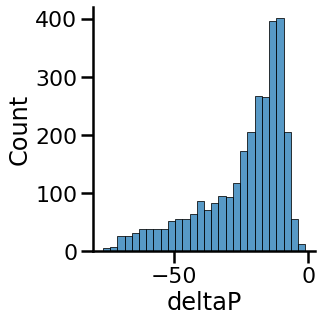

In [7]:
sns.displot(df[df['deltaP'] <= 0]['deltaP'])

In [8]:
df.describe()

,Datetime,TECHNUM,TAU,Latitude,Longitude,Windspeed,Pressure,RAD,RAD1,RAD2,...,dP,year,month,season,r34,translation_speed,r34m,Vm,f,deltaP
count,3183,0.0,3183.0,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,...,3183.000000,3183.000000,3183.000000,3183.000000,3023.000000,3183.000000,3023.000000,3183.000000,3183.000000,3023.000000
mean,2013-02-23 18:54:13.911404288,NaN,0.0,-16.610148,118.671128,60.851398,979.041470,34.049325,150.772466,162.994037,...,25.173735,2012.831605,4.321081,2012.027333,159.556570,14.045440,135623.084188,29.158833,0.000041,-24.262042
min,2001-10-26 06:00:00,NaN,0.0,-36.600000,41.300000,35.000000,916.000000,34.000000,0.000000,0.000000,...,1.000000,2001.000000,1.000000,2001.000000,18.520000,0.000000,15742.000000,7.141177,0.000013,-76.630155
25%,2008-02-14 15:00:00,NaN,0.0,-19.100000,92.500000,45.000000,970.000000,34.000000,101.860000,111.120000,...,12.000000,2008.000000,2.000000,2007.000000,111.120000,7.558085,94452.000000,19.869561,0.000034,-32.521571
50%,2013-03-17 12:00:00,NaN,0.0,-16.200000,115.500000,55.000000,985.000000,34.000000,138.900000,148.160000,...,19.000000,2013.000000,3.000000,2012.000000,150.475000,12.705306,127903.750000,25.722222,0.000041,-18.827527
75%,2019-01-07 03:00:00,NaN,0.0,-13.700000,146.800000,75.000000,993.000000,34.000000,194.460000,212.980000,...,33.000000,2019.000000,4.000000,2018.000000,199.090000,18.776985,169226.500000,35.617902,0.000048,-12.444263
max,2022-05-11 18:00:00,NaN,0.0,-5.200000,192.300000,125.000000,1007.000000,35.000000,500.040000,500.040000,...,88.000000,2022.000000,12.000000,2021.000000,423.645000,80.614589,360098.250000,64.305556,0.000087,52.758124
std,NaN,NaN,0.0,4.354456,30.227316,23.430579,18.320069,0.216579,74.017161,78.492840,...,17.858767,6.186087,3.694061,6.154174,62.341035,9.691095,52989.880147,11.920735,0.000011,16.039989


(-100.0, 0.0)

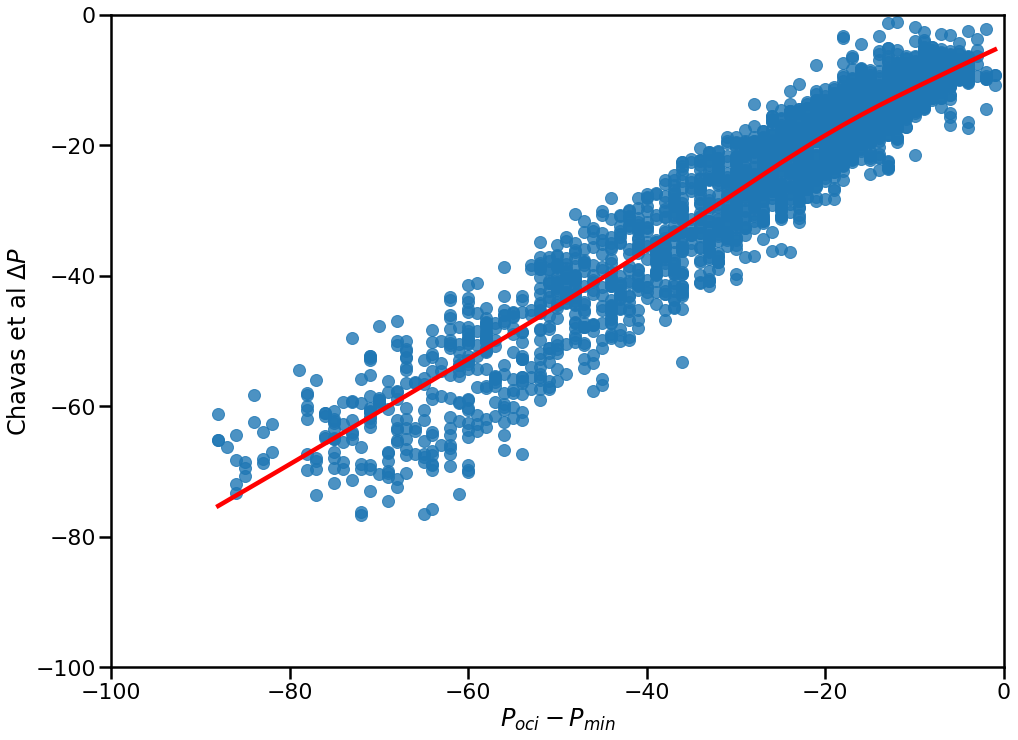

In [9]:
ax = sns.regplot(x=-1*df[df['deltaP'] <= 0]['dP'],
                 y=df[df['deltaP'] <= 0]['deltaP'],
                 line_kws={'color':'r'}, lowess=True)
ax.set_ylabel(r"Chavas et al $\Delta P$")
ax.set_xlabel(r"$P_{oci} - P_{min}$")
ax.set_xlim((-100, 0))
ax.set_ylim((-100, 0))

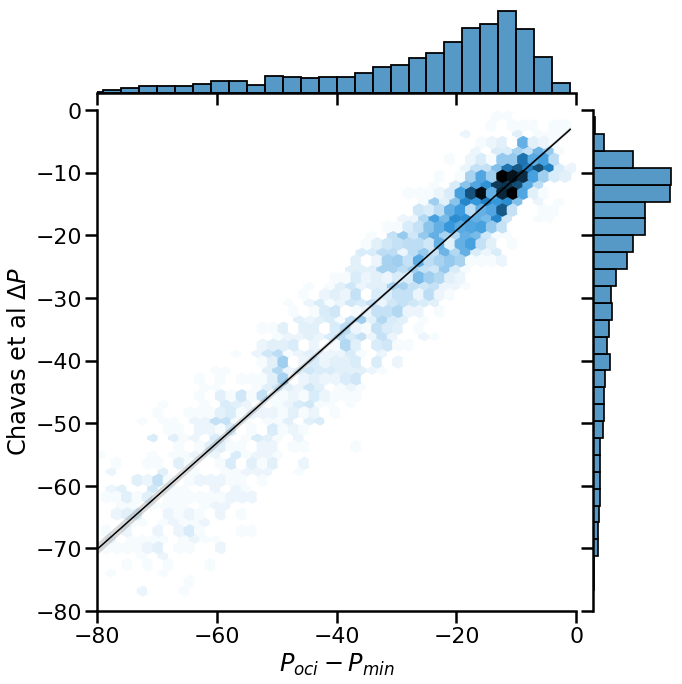

In [38]:
g = sns.jointplot(x=-1*df[df['deltaP'] <= 0]['dP'],
                  y=df[df['deltaP'] <= 0]['deltaP'], kind='hex', height=10,
                  gridsize=50, xlim=(-80, 0), ylim=(-80, 0))
g.plot_joint(sns.regplot, scatter=False, ci=99, line_kws={'color':'k', 'lw':1.5})
g.set_axis_labels(r"$P_{oci} - P_{min}$", r"Chavas et al $\Delta P$")
